In [1]:
# DSC 630
# Assignment Week 8
# Author :  Akila Selvaraj
# Created Date : 10/19/2022

# Change log
# Author: Akila Selvaraj
# Description : Initial version

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# This data gives the total monthly retail sales in the US from January 1992 until June 2021. 
us_rtl_sales_df=pd.read_csv('us_retail_sales.csv')
us_rtl_sales_df.info

<bound method DataFrame.info of     YEAR     JAN     FEB     MAR     APR     MAY     JUN       JUL       AUG  \
0   1992  146925  147223  146805  148032  149010  149800  150761.0  151067.0   
1   1993  157555  156266  154752  158979  160605  160127  162816.0  162506.0   
2   1994  167518  169649  172766  173106  172329  174241  174781.0  177295.0   
3   1995  182413  179488  181013  181686  183536  186081  185431.0  186806.0   
4   1996  189135  192266  194029  194744  196205  196136  196187.0  196218.0   
5   1997  202371  204286  204990  203399  201699  204675  207014.0  207635.0   
6   1998  209666  209552  210832  213633  214639  216337  214841.0  213636.0   
7   1999  223997  226250  227417  229037  231235  231903  233948.0  236566.0   
8   2000  243436  247133  249825  245831  246201  248160  247176.0  247576.0   
9   2001  252654  252704  250328  254763  255218  254022  252997.0  254560.0   
10  2002  256307  257670  257059  261333  257573  259786  262769.0  265043.0   
11  2003

In [4]:
# Plot the data with proper labeling and make some observations on the graph.

Before plotting the data, we have to pivot the data for making observations.

In [5]:
# Pivoting the data
us_rtl_sales_df = us_rtl_sales_df.melt(id_vars=["YEAR"], var_name="Month", value_name="Value")
us_rtl_sales_df

,YEAR,Month,Value
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0
...,...,...,...
355,2017,DEC,433282.0
356,2018,DEC,434803.0
357,2019,DEC,458055.0
358,2020,DEC,484782.0


In [6]:
# Converting month name to month number
month_name = "Jan"
datetime_object = datetime.datetime.strptime(month_name, "%b")
month_number = datetime_object.month
print(month_number)

1


In [7]:
# us_rtl_sales_df['month_num'] = datetime.datetime.strptime(us_rtl_sales_df['Month'], "%b").month

In [8]:
# ToNumber(substring(DateTimeParse([month], "%b"),5,2))

In [9]:
# Converting month name to month number
us_rtl_sales_df['month_num'] = pd.to_datetime(us_rtl_sales_df.Month, format='%b').dt.month.astype(str)
us_rtl_sales_df

,YEAR,Month,Value,month_num
0,1992,JAN,146925.0,1
1,1993,JAN,157555.0,1
2,1994,JAN,167518.0,1
3,1995,JAN,182413.0,1
4,1996,JAN,189135.0,1
...,...,...,...,...
355,2017,DEC,433282.0,12
356,2018,DEC,434803.0,12
357,2019,DEC,458055.0,12
358,2020,DEC,484782.0,12


In [10]:
# Appending zero the month number to create the date format
us_rtl_sales_df['month_num'] = '0' + us_rtl_sales_df['month_num']
us_rtl_sales_df

,YEAR,Month,Value,month_num
0,1992,JAN,146925.0,01
1,1993,JAN,157555.0,01
2,1994,JAN,167518.0,01
3,1995,JAN,182413.0,01
4,1996,JAN,189135.0,01
...,...,...,...,...
355,2017,DEC,433282.0,012
356,2018,DEC,434803.0,012
357,2019,DEC,458055.0,012
358,2020,DEC,484782.0,012


In [11]:
# Keeping two digits for month number and stripping third digit if present
# us_rtl_sales_df['month_num'] = us_rtl_sales_df.month_num[:-1]
us_rtl_sales_df['month_num'] = us_rtl_sales_df['month_num'].str.strip().str[-2:]
us_rtl_sales_df

,YEAR,Month,Value,month_num
0,1992,JAN,146925.0,01
1,1993,JAN,157555.0,01
2,1994,JAN,167518.0,01
3,1995,JAN,182413.0,01
4,1996,JAN,189135.0,01
...,...,...,...,...
355,2017,DEC,433282.0,12
356,2018,DEC,434803.0,12
357,2019,DEC,458055.0,12
358,2020,DEC,484782.0,12


In [12]:
# Creating a column Date
us_rtl_sales_df['Date'] = us_rtl_sales_df['YEAR'].astype(str)  + '-'  + us_rtl_sales_df['month_num'] + '-01'
us_rtl_sales_df

,YEAR,Month,Value,month_num,Date
0,1992,JAN,146925.0,01,1992-01-01
1,1993,JAN,157555.0,01,1993-01-01
2,1994,JAN,167518.0,01,1994-01-01
3,1995,JAN,182413.0,01,1995-01-01
4,1996,JAN,189135.0,01,1996-01-01
...,...,...,...,...,...
355,2017,DEC,433282.0,12,2017-12-01
356,2018,DEC,434803.0,12,2018-12-01
357,2019,DEC,458055.0,12,2019-12-01
358,2020,DEC,484782.0,12,2020-12-01


In [13]:
#sort by date

print(type(us_rtl_sales_df.Date[0]))
# convert to date
us_rtl_sales_df['Date'] = pd.to_datetime(us_rtl_sales_df['Date'], format='%Y-%m-%d')
us_rtl_sales_df = us_rtl_sales_df.sort_values(by='Date')
print(us_rtl_sales_df)
print(type(us_rtl_sales_df.Date[0]))

<class 'str'>
     YEAR Month     Value month_num       Date
0    1992   JAN  146925.0        01 1992-01-01
30   1992   FEB  147223.0        02 1992-02-01
60   1992   MAR  146805.0        03 1992-03-01
90   1992   APR  148032.0        04 1992-04-01
120  1992   MAY  149010.0        05 1992-05-01
..    ...   ...       ...       ...        ...
239  2021   AUG       NaN        08 2021-08-01
269  2021   SEP       NaN        09 2021-09-01
299  2021   OCT       NaN        10 2021-10-01
329  2021   NOV       NaN        11 2021-11-01
359  2021   DEC       NaN        12 2021-12-01

[360 rows x 5 columns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [14]:
# Keeping the created date column and dropping year, month and month_num
us_rtl_sales_df=us_rtl_sales_df.drop(['YEAR','Month','month_num'],1)
print(us_rtl_sales_df)
us_rtl_sales_df=us_rtl_sales_df.dropna()
print(us_rtl_sales_df)
print(us_rtl_sales_df.isna().sum())

        Value       Date
0    146925.0 1992-01-01
30   147223.0 1992-02-01
60   146805.0 1992-03-01
90   148032.0 1992-04-01
120  149010.0 1992-05-01
..        ...        ...
239       NaN 2021-08-01
269       NaN 2021-09-01
299       NaN 2021-10-01
329       NaN 2021-11-01
359       NaN 2021-12-01

[360 rows x 2 columns]
        Value       Date
0    146925.0 1992-01-01
30   147223.0 1992-02-01
60   146805.0 1992-03-01
90   148032.0 1992-04-01
120  149010.0 1992-05-01
..        ...        ...
59   504458.0 2021-02-01
89   559871.0 2021-03-01
119  562269.0 2021-04-01
149  548987.0 2021-05-01
179  550782.0 2021-06-01

[354 rows x 2 columns]
Value    0
Date     0
dtype: int64


C:\Users\Akila\AppData\Local\Temp\ipykernel_31620\138177490.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  us_rtl_sales_df=us_rtl_sales_df.drop(['YEAR','Month','month_num'],1)


In [15]:
# Converting date into index
us_rtl_sales_df.index = pd.to_datetime(us_rtl_sales_df['Date'])
us_rtl_sales_df.drop(columns='Date',inplace=True)
us_rtl_sales_df.head()

,Value
Date,
1992-01-01,146925.0
1992-02-01,147223.0
1992-03-01,146805.0
1992-04-01,148032.0
1992-05-01,149010.0


<AxesSubplot:xlabel='Date'>

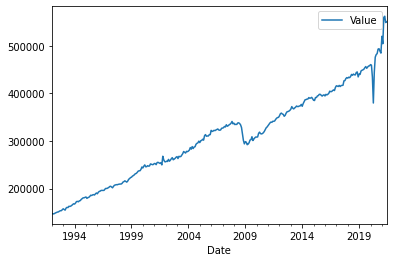

In [16]:
# Plotting the sales data
us_rtl_sales_df.plot()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

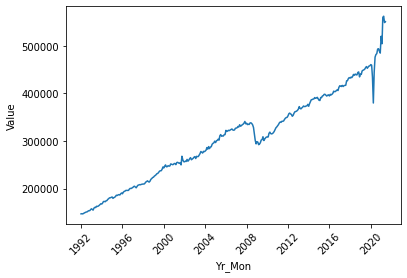

In [17]:
plt.ylabel('Value')
plt.xlabel('Yr_Mon')
plt.xticks(rotation=45)
plt.plot(us_rtl_sales_df.index, us_rtl_sales_df['Value'], )
plt.plot

Above graph shows the plot of sales over the timeframe. From the graph, we can say that sales increasingly exponentially over the timeframe.However, in the year 2020, during covid, the sales went down and then went up.

In [18]:
#convert to time series:
ts = us_rtl_sales_df['Value']
ts.head(10)

Date
1992-01-01    146925.0
1992-02-01    147223.0
1992-03-01    146805.0
1992-04-01    148032.0
1992-05-01    149010.0
1992-06-01    149800.0
1992-07-01    150761.0
1992-08-01    151067.0
1992-09-01    152588.0
1992-10-01    153521.0
Name: Value, dtype: float64

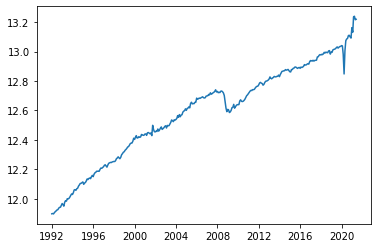

In [19]:
ts_log=np.log(ts)
plt.plot(ts_log)

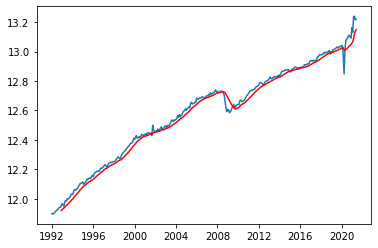

In [20]:
# Moving average
# moving_avg = pd.rolling_mean(ts_log,12)
moving_avg = ts_log.rolling(window=12).mean()
rolstd = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

Above graph shows the plot of moving average. Graph is not broken which shows that there is no missing values.

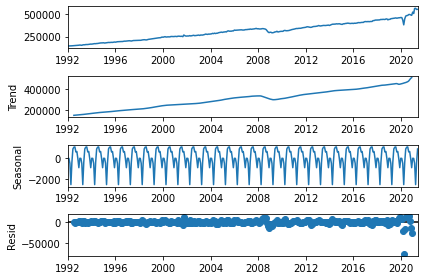

In [21]:
# Decomposing the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(us_rtl_sales_df, model="additive")
decompose_data.plot();

<AxesSubplot:xlabel='Date'>

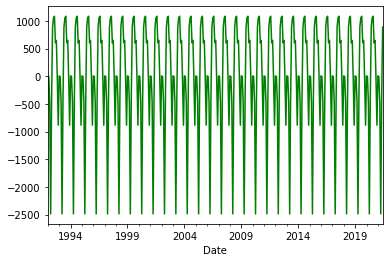

In [22]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

From the seasonal plot, we can say that sales goes up during particular season each year.

In [23]:
train = us_rtl_sales_df[us_rtl_sales_df.index < '2020-07-01']
test = us_rtl_sales_df[us_rtl_sales_df.index > '2020-07-01']
print("train",train)
print("test",test)

train                Value
Date                
1992-01-01  146925.0
1992-02-01  147223.0
1992-03-01  146805.0
1992-04-01  148032.0
1992-05-01  149010.0
...              ...
2020-02-01  459610.0
2020-03-01  434281.0
2020-04-01  379892.0
2020-05-01  444631.0
2020-06-01  476343.0

[342 rows x 1 columns]
test                Value
Date                
2020-08-01  483716.0
2020-09-01  493327.0
2020-10-01  493991.0
2020-11-01  488652.0
2020-12-01  484782.0
2021-01-01  520162.0
2021-02-01  504458.0
2021-03-01  559871.0
2021-04-01  562269.0
2021-05-01  548987.0
2021-06-01  550782.0


In [24]:
# Split this data into a training and test set. 
# Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.
train = us_rtl_sales_df[us_rtl_sales_df.index < pd.to_datetime("2020-07-01", format='%Y-%m-%d')]
test = us_rtl_sales_df[us_rtl_sales_df.index >= pd.to_datetime("2020-07-01", format='%Y-%m-%d')]
print("train",train)
print("test",test)

train                Value
Date                
1992-01-01  146925.0
1992-02-01  147223.0
1992-03-01  146805.0
1992-04-01  148032.0
1992-05-01  149010.0
...              ...
2020-02-01  459610.0
2020-03-01  434281.0
2020-04-01  379892.0
2020-05-01  444631.0
2020-06-01  476343.0

[342 rows x 1 columns]
test                Value
Date                
2020-07-01  481627.0
2020-08-01  483716.0
2020-09-01  493327.0
2020-10-01  493991.0
2020-11-01  488652.0
2020-12-01  484782.0
2021-01-01  520162.0
2021-02-01  504458.0
2021-03-01  559871.0
2021-04-01  562269.0
2021-05-01  548987.0
2021-06-01  550782.0


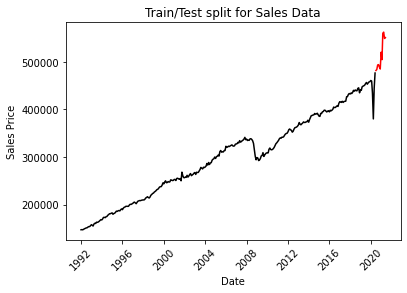

In [25]:
#Plotting training and test sales data
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Sales Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.show()

# <span style='background :yellow' > Defining an ARMA model using the SARIMAX package </span>

In [26]:
# ARMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
# Using the training set to build a predictive model for the monthly retail sales.
# define our input
y = train['Value']
# To define an ARMA model with the SARIMAX class, we pass in the order parameters of (1, 0 ,1)
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
# fit our model
ARMAmodel = ARMAmodel.fit()
ARMAmodel.summary()

C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  342
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -3461.131
Date:                Wed, 19 Oct 2022   AIC                           6928.261
Time:                        21:15:08   BIC                           6939.765
Sample:                    01-01-1992   HQIC                          6932.844
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   3077.797      0.000       0.999       1.000
ma.L1          0.0058      0.008      0.706      0.480      -0.010       0.022
sigma2      3.473e+07   5.63e-11   6.17e+17      0.000    3.47e+07    3.47e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):             62399.17
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              25.07   Skew:                             1.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        69.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.08e+32. Standard errors may be unstable.
"""

In [28]:
# Generate our predictions
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

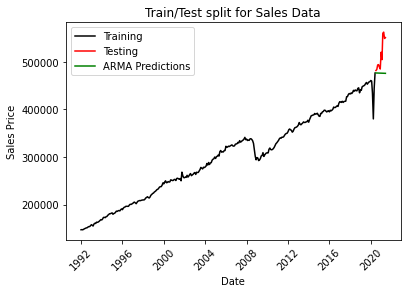

In [29]:
# plot the results
plt.plot(train, color = "black",label = 'Training')
plt.plot(test, color = "red",label = 'Testing')
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.ylabel('Sales Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
# plt.show()

plt.legend()

In [30]:
# Report the RMSE of the model predictions on the test set
# evaluate the performance using the root mean-squared error
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Value"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  49316.86837957215


# <span style='background :yellow' > Predictions using ARIMA model </span> 

In [31]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE:  49316.86837957215


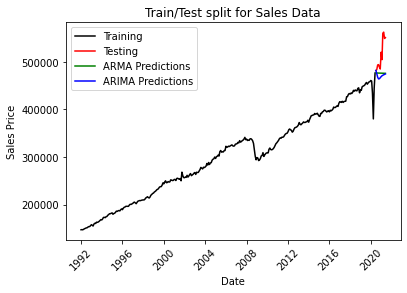

In [32]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred_ar = ARIMAmodel.get_forecast(len(test.index))
y_pred_df_ar = y_pred_ar.conf_int(alpha = 0.05) 
y_pred_df_ar["Predictions"] = ARIMAmodel.predict(start = y_pred_df_ar.index[0], end = y_pred_df_ar.index[-1])
y_pred_df_ar.index = test.index
y_pred_out_ar = y_pred_df_ar["Predictions"] 


plt.plot(train, color = "black",label = 'Training')
plt.plot(test, color = "red",label = 'Testing')
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ar, color='Blue', label = 'ARIMA Predictions')
plt.ylabel('Sales Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()


arma_rmse = np.sqrt(mean_squared_error(test["Value"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

Increasing the differencing parameter to ARIMA (2,3,2)

C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE:  49316.86837957215


C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


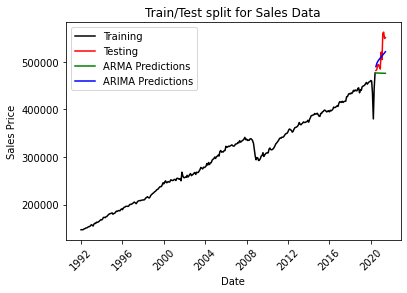

In [33]:
ARIMAmodel = ARIMA(y, order = (2, 3, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred_ar = ARIMAmodel.get_forecast(len(test.index))
y_pred_df_ar = y_pred_ar.conf_int(alpha = 0.05) 
y_pred_df_ar["Predictions"] = ARIMAmodel.predict(start = y_pred_df_ar.index[0], end = y_pred_df_ar.index[-1])
y_pred_df_ar.index = test.index
y_pred_out_ar = y_pred_df_ar["Predictions"] 


plt.plot(train, color = "black",label = 'Training')
plt.plot(test, color = "red",label = 'Testing')
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ar, color='Blue', label = 'ARIMA Predictions')
plt.ylabel('Sales Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()


arma_rmse = np.sqrt(mean_squared_error(test["Value"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

Increasing the differencing parameter to ARIMA (5,4,2)

C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Date
2020-07-01    489690.004456
2020-08-01    496435.135164
2020-09-01    500377.549401
2020-10-01    503218.923190
2020-11-01    505622.191351
2020-12-01    507860.586052
2021-01-01    510044.126489
2021-02-01    512217.538038
2021-03-01    514398.931282
2021-04-01    516595.651562
2021-05-01    518810.676050
2021-06-01    521045.211760
Name: Predictions, dtype: float64
RMSE:  49316.86837957215


C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


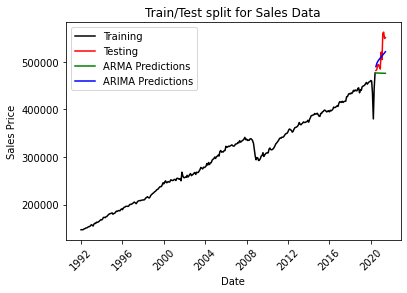

In [34]:
ARIMAmodel = ARIMA(y, order = (2, 3, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred_ar = ARIMAmodel.get_forecast(len(test.index))
y_pred_df_ar = y_pred_ar.conf_int(alpha = 0.05) 
y_pred_df_ar["Predictions"] = ARIMAmodel.predict(start = y_pred_df_ar.index[0], end = y_pred_df_ar.index[-1])
y_pred_df_ar.index = test.index
y_pred_out_ar = y_pred_df_ar["Predictions"] 
print(y_pred_out_ar)

plt.plot(train, color = "black",label = 'Training')
plt.plot(test, color = "red",label = 'Testing')
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ar, color='Blue', label = 'ARIMA Predictions')
plt.ylabel('Sales Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()


arma_rmse = np.sqrt(mean_squared_error(test["Value"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

# <span style='background :yellow' > Seasonal ARIMA (SARIMA) </span> 

C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Date
2020-07-01    471192.213067
2020-08-01    475038.598521
2020-09-01    483893.531781
2020-10-01    494492.126927
2020-11-01    515296.104814
2020-12-01    533696.380090
2021-01-01    549419.449951
2021-02-01    564300.826782
2021-03-01    567598.368066
2021-04-01    552733.947530
2021-05-01    615394.016589
2021-06-01    658004.412803
Name: Predictions, dtype: float64


C:\Users\Akila\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


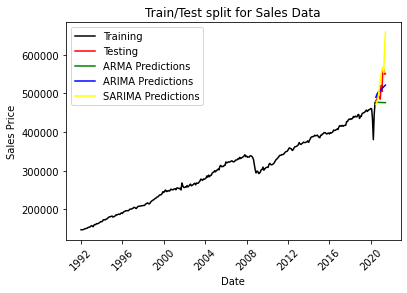

In [35]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(1,1,1,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred_sa = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df_sa = y_pred_sa.conf_int(alpha = 0.05) 
y_pred_df_sa["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sa.index[0], end = y_pred_df_sa.index[-1])
y_pred_df_sa.index = test.index
y_pred_out_sa = y_pred_df_sa["Predictions"] 
print(y_pred_out_sa)



plt.plot(train, color = "black",label = 'Training')
plt.plot(test, color = "red",label = 'Testing')
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ar, color='Blue', label = 'ARIMA Predictions')
plt.plot(y_pred_out_sa, color='Yellow', label = 'SARIMA Predictions')
plt.ylabel('Sales Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
# plot(figsize=(12,8))


In [36]:
arma_rmse = np.sqrt(mean_squared_error(test["Value"].values, y_pred_df_sa["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  44600.33428863


From the different time series model and the plot we did, we can say that SARIMA predictions is better than other models.